# Rede Perceptron de Múltiplas Camadas
&nbsp;

**Questão 2** - Implemente uma rede perceptron de múltiplas camadas e utilize-a para aproximar as duas
funções abaixo. Em seguida, compare os resultados com as curvas exatas. No caso da letra
(b), apresente também a curva do erro médio de treinamento com relação ao número de
épocas e a curva do erro médio com o conjunto de validação.

**a)** Função lógica XOR <br>
**b)** _f(x) = sen(πx) / πx_ , 0 ≤ x ≤ 4
&nbsp;

### b) _f(x) = sen(πx) / πx_ , 0 ≤ x ≤ 4

In [1]:
import matplotlib.pyplot as plt 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from data_generator_b import generator
from sklearn.metrics import confusion_matrix, r2_score

In [2]:
X, y = generator(2000)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [3]:
ann = Sequential()

In [4]:
ann.add(Dense(10, input_shape=(1,), activation='relu'))
ann.add(Dense(5, activation='relu'))
ann.add(Dense(1, activation='linear'))

In [5]:
ann.compile(optimizer='adam', loss='mean_absolute_error', metrics=['mean_squared_error'])
history = ann.fit(X_train, y_train, epochs=100, batch_size=64, validation_split=0.2, verbose=2)

Epoch 1/100
20/20 - 0s - loss: 0.4368 - mean_squared_error: 0.2397 - val_loss: 0.3789 - val_mean_squared_error: 0.1896
Epoch 2/100
20/20 - 0s - loss: 0.3550 - mean_squared_error: 0.1819 - val_loss: 0.3077 - val_mean_squared_error: 0.1493
Epoch 3/100
20/20 - 0s - loss: 0.2923 - mean_squared_error: 0.1529 - val_loss: 0.2519 - val_mean_squared_error: 0.1279
Epoch 4/100
20/20 - 0s - loss: 0.2527 - mean_squared_error: 0.1382 - val_loss: 0.2278 - val_mean_squared_error: 0.1177
Epoch 5/100
20/20 - 0s - loss: 0.2368 - mean_squared_error: 0.1301 - val_loss: 0.2153 - val_mean_squared_error: 0.1113
Epoch 6/100
20/20 - 0s - loss: 0.2272 - mean_squared_error: 0.1233 - val_loss: 0.2067 - val_mean_squared_error: 0.1054
Epoch 7/100
20/20 - 0s - loss: 0.2197 - mean_squared_error: 0.1171 - val_loss: 0.1998 - val_mean_squared_error: 0.0995
Epoch 8/100
20/20 - 0s - loss: 0.2132 - mean_squared_error: 0.1107 - val_loss: 0.1936 - val_mean_squared_error: 0.0935
Epoch 9/100
20/20 - 0s - loss: 0.2069 - mean_squ

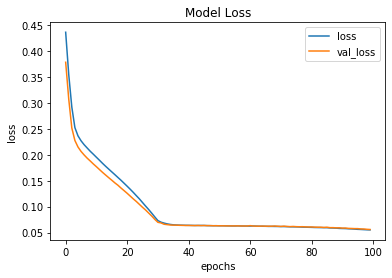

In [6]:
plt.plot(history.history["loss"], label="loss")
plt.plot(history.history["val_loss"], label="val_loss")
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend()

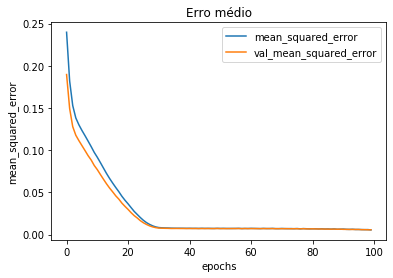

In [7]:
plt.plot(history.history["mean_squared_error"], label="mean_squared_error")
plt.plot(history.history["val_mean_squared_error"], label="val_mean_squared_error")
plt.title('Erro médio')
plt.ylabel('mean_squared_error')
plt.xlabel('epochs')
plt.legend()

In [8]:
y_pred = ann.predict(X_test)
print(f'Score: {round(r2_score(y_test, y_pred)*100,2)}%')

Score: 94.06%
